# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# **Load/read the Dataset**

In [3]:
df = pd.read_csv("survey.csv")


# **Data Exploration**

In [4]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [5]:
df.shape

(292364, 17)

In [6]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [8]:
df.describe(include='O')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


# **Data Preprocessing and Cleaning**

## Missing Values

In [9]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

Missing values per column:
 self_employed    5202
dtype: int64


In [10]:
# For simplicity, drop 'comments' column since it has many missing values and is free-text
if 'comments' in df.columns:
    df = df.drop(columns=['comments'])

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

In [13]:
missing_counts = df.isnull().sum()
print("Missing values per column after cleaning:\n", missing_counts)

Missing values per column after cleaning:
 Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


# **Exploratory Data Analysis (EDA)**

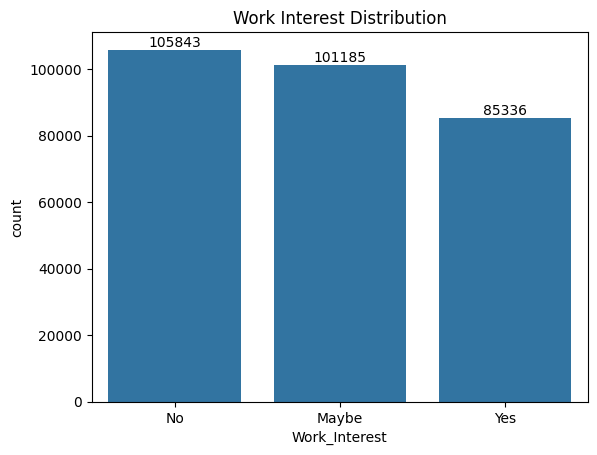

In [16]:
#Plot **Work_Interest**
ax = sns.countplot(data = df , x = 'Work_Interest');
#Add the value of each parameter on the Plot
ax.bar_label(ax.containers[0]);
plt.title('Work Interest Distribution');

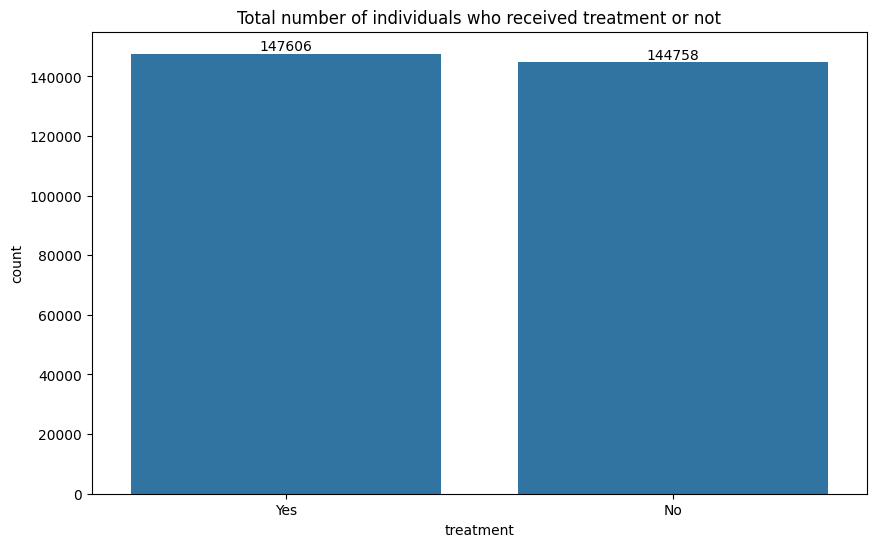

In [17]:
plt.figure(figsize = (10,6));
treat = sns.countplot(data = df,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

C:\Users\piyus\AppData\Local\Temp\ipykernel_7980\3366361813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


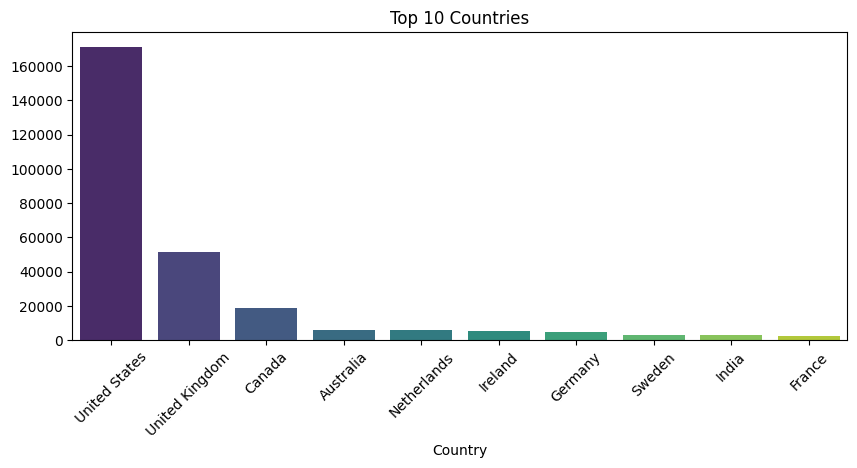

In [18]:
top_countries = df["Country"].value_counts().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Countries")
plt.show()

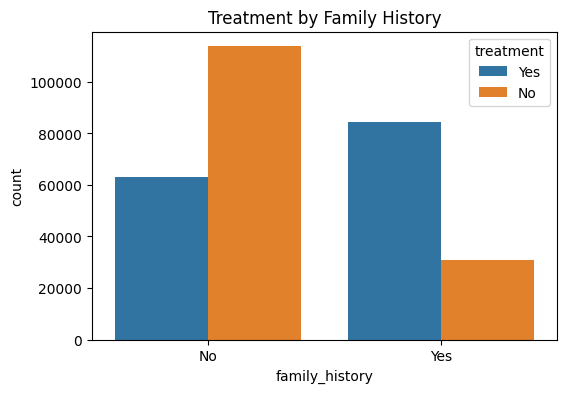

In [19]:

plt.figure(figsize=(6, 4))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title("Treatment by Family History")
plt.show()

In [20]:
df['Gender'] = df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male'], 'Male')
df['Gender'] = df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Female', 'Cis Female'], 'Female')



print(df['Gender'].unique())


['Female' 'Male']


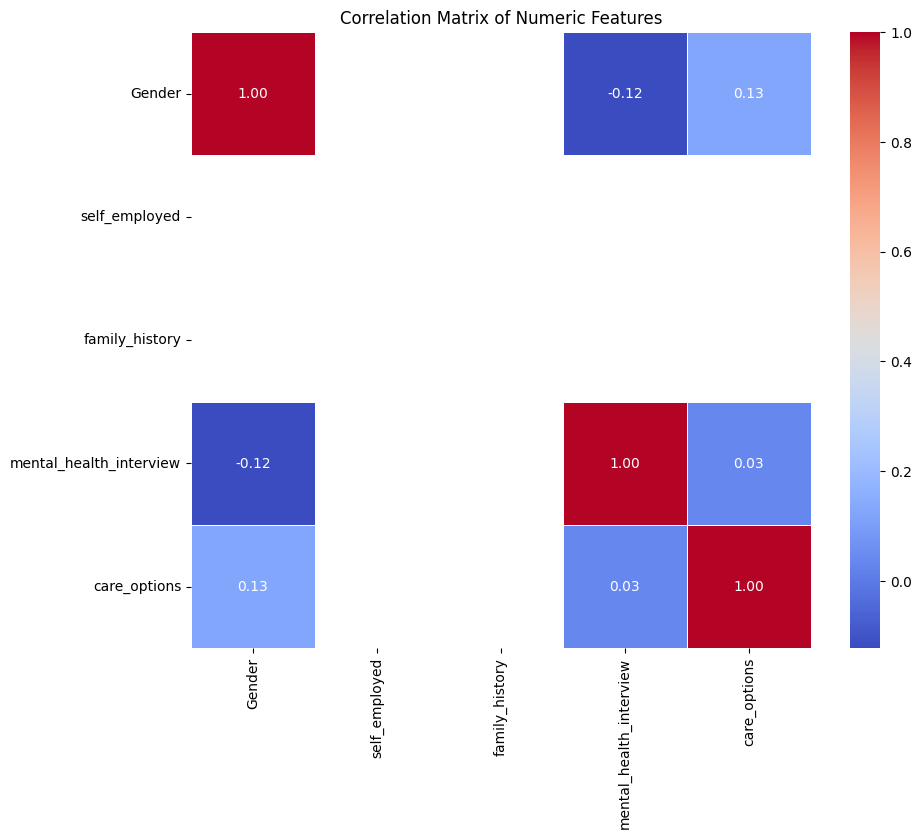

In [22]:
# robust Gender mapping (only map if values are strings)
if df['Gender'].dtype == object:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Unknown': 2})

# mapping for categorical columns, only apply to columns that exist
mapping = {
    'Yes': 1, 'No': 0, 'Maybe': 0.5, "Somewhat easy": 1, "Somewhat difficult": 0.5,
    "Don't know": np.nan, 'Some of them': 0.5, 'None': 0
}

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].map(mapping)

# select numeric columns robustly and plot correlation
numeric_cols = df.select_dtypes(include=['number']).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Numeric Features")
    plt.show()
else:
    print("Not enough numeric columns to compute a correlation matrix.")

In [23]:

columns_to_encode = ['Country', 'state', 'self_employed', 'family_history', 
                     'work_interfere', 'no_employees', 'remote_work', 
                     'tech_company', 'benefits', 'care_options', 
                     'wellness_program', 'seek_help', 'anonymity', 
                     'leave', 'mental_health_consequence', 
                     'phys_health_consequence', 'coworkers', 
                     'supervisor', 'mental_health_interview', 
                     'phys_health_interview', 'mental_vs_physical', 
                     'obs_consequence']


existing_columns = [col for col in columns_to_encode if col in df.columns]


df = pd.get_dummies(df, columns=existing_columns, drop_first=True)


print("Shape after one-hot encoding:", df.shape)

Shape after one-hot encoding: (292364, 49)


# **Train/Test Split**

In [69]:
# X = df.drop(columns=['treatment'])
# y = df['treatment']

# **Training of Random Forest**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# drop timestamp if present
if 'Timestamp' in df.columns:
    df = df.drop(columns=['Timestamp'])

X = df.drop(columns=['treatment'])
y = df['treatment']

# split numeric/bool and categorical columns
numeric_cols = X.select_dtypes(include=['number', 'bool']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# numeric pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# categorical pipeline (FIXED)
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_cols),
        ('cat', cat_pipeline, categorical_cols)
    ]
)

# preprocess data
X_processed = preprocessor.fit_transform(X)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


Training data shape: (204654, 68)
Testing data shape: (87710, 68)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [34]:
y_pred = rf_model.predict(X_test)


In [35]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6576559115266218

Classification Report:
               precision    recall  f1-score   support

          No       0.64      0.71      0.67     43529
         Yes       0.68      0.61      0.64     44181

    accuracy                           0.66     87710
   macro avg       0.66      0.66      0.66     87710
weighted avg       0.66      0.66      0.66     87710



# **Multiple Models:**

- Logistic Regression
- Random Forest
- XGBoost
- LightGBM

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


y_train_encoded = y_train.map({'No': 0, 'Yes': 1})
y_test_encoded = y_test.map({'No': 0, 'Yes': 1})


models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}


results = {}


for name, model in models.items():
    
    if name in ['Logistic Regression', 'Random Forest']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred))
    else:
        
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test_encoded, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Classification Report:")
        print(classification_report(y_test_encoded, y_pred))
    
    print("-" * 60)

Logistic Regression Accuracy: 0.6655
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.64      0.74      0.69     43529
         Yes       0.70      0.59      0.64     44181

    accuracy                           0.67     87710
   macro avg       0.67      0.67      0.66     87710
weighted avg       0.67      0.67      0.66     87710

------------------------------------------------------------
Random Forest Accuracy: 0.6577
Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.64      0.71      0.67     43529
         Yes       0.68      0.61      0.64     44181

    accuracy                           0.66     87710
   macro avg       0.66      0.66      0.66     87710
weighted avg       0.66      0.66      0.66     87710

------------------------------------------------------------


C:\Users\piyus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [22:00:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.6856
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70     43529
           1       0.71      0.64      0.67     44181

    accuracy                           0.69     87710
   macro avg       0.69      0.69      0.69     87710
weighted avg       0.69      0.69      0.68     87710

------------------------------------------------------------
[LightGBM] [Info] Number of positive: 103425, number of negative: 101229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 204654, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505365 -> initscore=0.021461
[LightGBM] [Info] Start training from score 0.02146

C:\Users\piyus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# **AUC-ROC Curve**

C:\Users\piyus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


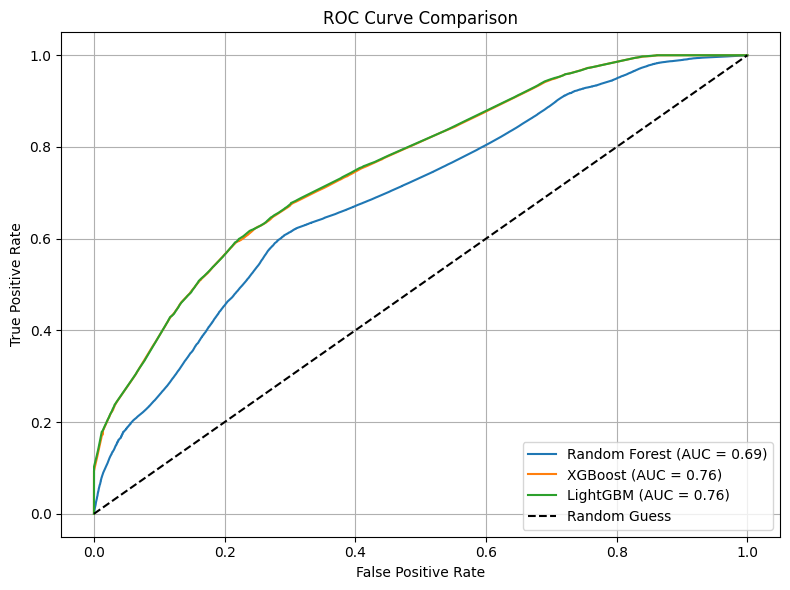

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


model_list = [
    ('Random Forest', models['Random Forest'], y_test, False),
    ('XGBoost', models['XGBoost'], y_test_encoded, True),
    ('LightGBM', models['LightGBM'], y_test_encoded, True),
]

plt.figure(figsize=(8, 6))


for name, model, y_true, encoded in model_list:
    y_proba = model.predict_proba(X_test)[:, 1]  
    pos_label = 1 if encoded else 'Yes'         
    fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=pos_label)  
    roc_auc = auc(fpr, tpr)                     
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()